In [110]:
import pandas
import matplotlib.pyplot as plt
import scipy.stats as stats

In [111]:
df = pandas.read_csv('weatherHistory.csv')
print(len(df))
x_title = 'Temperature (C)'
to_choose = df.head(300)
x_values = to_choose['Temperature (C)']
y_values = to_choose['Apparent Temperature (C)']
to_choose

96453


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2006-04-20 07:00:00.000 +0200,Foggy,rain,10.161111,10.161111,0.99,0.3381,81.0,0.4347,0.0,1013.61,Foggy starting overnight continuing until morn...
296,2006-04-20 08:00:00.000 +0200,Foggy,rain,11.244444,11.244444,0.98,2.7531,358.0,0.6923,0.0,1013.90,Foggy starting overnight continuing until morn...
297,2006-04-20 09:00:00.000 +0200,Foggy,rain,12.244444,12.244444,0.99,2.2540,152.0,2.2057,0.0,1014.31,Foggy starting overnight continuing until morn...
298,2006-04-20 10:00:00.000 +0200,Overcast,rain,13.911111,13.911111,0.92,8.0983,135.0,4.2021,0.0,1014.43,Foggy starting overnight continuing until morn...


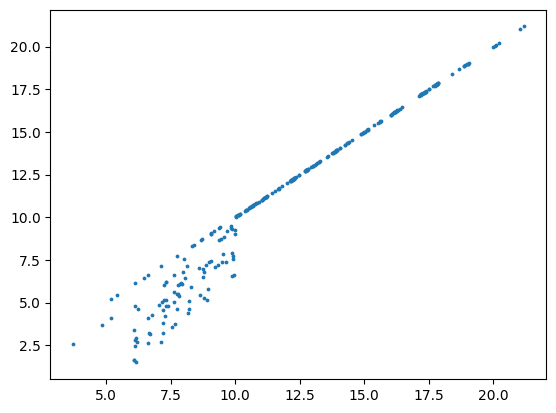

In [112]:
plt.scatter(x_values, y_values, s=3)
plt.show()

Задание 3

Для всех дальнейших вычислений Возьмем уровень значимости как $\alpha=0,05$

Нормальность температуры и ощутимой температуры проверяем с помощью теста Д'Агостино-Пирсона

Далее посчитаем коэффициент корреляции Пирсона и проверим его значимость по t-статистике $t_н = \dfrac{|r|*\sqrt{n-2}}{\sqrt{1-r^2}}$

Доверительный интервал для него будет вычисляться с помощью Z-преобразования Фишера: $(arcth r^{*} - \dfrac{u_{\gamma}}{n-3}, arcth r^{*} + \dfrac{u_{\gamma}}{n-3})$, где $u_{\gamma}$ - квантиль стандартного нормального распределения уровня $\gamma=1-\dfrac{\alpha}{2}$

In [113]:
from numpy import fabs, sqrt, arctanh, tanh

p_value = 0.05  # Уровень значимости

# Проверка нормальности
print(f"Нормальность X: {stats.normaltest(x_values).pvalue < p_value}")
print(f"Нормальность Y: {stats.normaltest(y_values).pvalue < p_value}")

# Коэффициент корреляции Пирсона, его значимость и доверительный интервал
coeff_pearson = stats.pearsonr(x_values, y_values, alternative='two-sided')
print()
print(f"Коэффициент корреляции Пирсона: {coeff_pearson.statistic}")
print(f"Значимость коэффициента корреляции Пирсона:")
observed = fabs(coeff_pearson.statistic) * sqrt(len(to_choose) - 2) / sqrt(1 - (coeff_pearson.statistic ** 2))
print(f"    Наблюдаемая статистика (модуль): {observed}")
critical = fabs(stats.t.ppf(p_value, len(to_choose) - 2))
print(f"    Критическая статистика (модуль): {critical}")
print(f"    Значимость?: {observed > critical}")
z_value = arctanh(coeff_pearson.statistic)
deviation = stats.norm.ppf(1 - p_value / 2) / (len(to_choose) - 3)
print(f"Доверительный интервал: ({tanh(z_value - deviation)}, {tanh(z_value + deviation)})")

Нормальность X: True
Нормальность Y: True

Коэффициент корреляции Пирсона: 0.9806870859405218
Значимость коэффициента корреляции Пирсона:
    Наблюдаемая статистика (модуль): 86.55790758983747
    Критическая статистика (модуль): 1.6499829759955271
    Значимость?: True
Доверительный интервал: (0.9804330069494428, 0.980937897451177)


Задание 4

In [114]:
import statsmodels.api as sm
import numpy as np

x_for_regression = sm.add_constant(x_values)
model = sm.OLS(y_values, x_for_regression).fit()
a = model.params['const']
b = model.params[x_title]
print(f"Уравнение регрессии: y = {a:.3f} + {b:.3f}*x")
print(f"Коэффициент детерминации: {model.rsquared:.3f}")
print(f"F-статистика: {model.fvalue:.3f}")
f_critical = stats.f.ppf(p_value, model.df_model, model.df_resid)
print(f"F-критическая: {f_critical:.3f}")
print(f"Значимоть уравнения (F-тест): {model.fvalue > f_critical}")
print("t-статистики: ")
t_a = model.tvalues['const']
t_b = model.tvalues[x_title]
t_critical = stats.t.ppf(p_value, len(to_choose) - 2)
print(f"    a: {t_a:.3f}")
print(f"    b: {t_b:.3f}")
print(f"    Критическая: {t_critical:.3f}")
print("Значимость коэффициентов (t-тест)")
print(f"    a: {fabs(t_a) > fabs(t_critical)}")
print(f"    b: {fabs(t_b) > fabs(t_critical)}")
print(f"Средняя ошибка аппроксимации: {np.mean(np.abs(model.resid) / y_values) * 100:.3f}%")
print(f"Средняя эластичность: {np.mean(b * x_values / model.fittedvalues):.3f}")

Уравнение регрессии: y = -2.911 + 1.187*x
Коэффициент детерминации: 0.962
F-статистика: 7492.271
F-критическая: 0.004
Значимоть уравнения (F-тест): True
t-статистики: 
    a: -16.569
    b: 86.558
    Критическая: -1.650
Значимость коэффициентов (t-тест)
    a: True
    b: True
Средняя ошибка аппроксимации: 11.786%
Средняя эластичность: 1.309


График регрессии


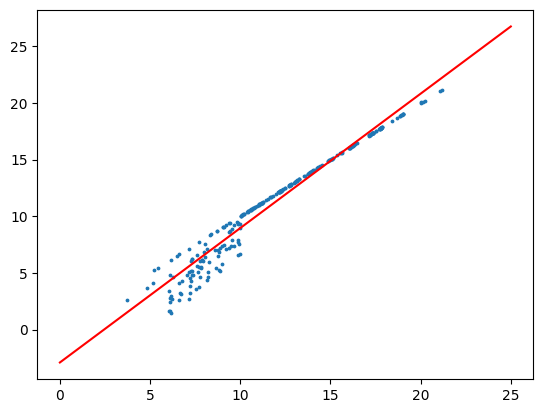

In [115]:
print("График регрессии")
plt.scatter(x_values, y_values, s=3)
gr_x = np.linspace(0, 25, 400)
gr_y = a + b * gr_x
plt.plot(gr_x, gr_y, color='r')
plt.show()

Задание 5:

Условия Гаусса-Маркова:
1. $\sum \epsilon_i=0$
2. $cov(\epsilon_i, \epsilon_{i-1}) = 0$
3. $\sigma^2_{\epsilon} = const$
4. $\epsilon_i$ имеет нормальное распределение

График остатков


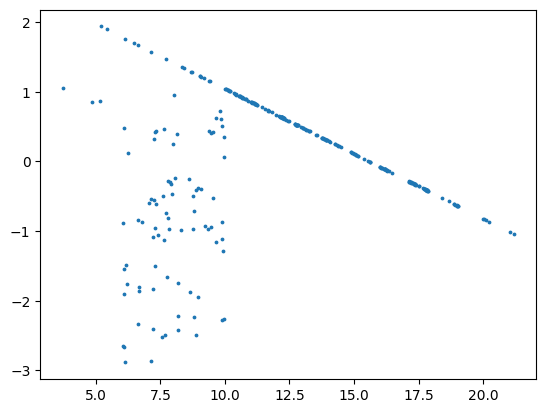

In [116]:
print("График остатков")
plt.scatter(x_values, model.resid, s=3)
plt.show()

In [122]:
print("Проверка условий Гаусса-Маркова")
print(f"    1. Cумма остатков {sum(model.resid)}")
print(f"    2. Отсутствие автокорреляции (тест Бройша-Годфрея): {sm.stats.diagnostic.acorr_breusch_godfrey(model)[1] > p_value}")
print(
    f"    3. Отсутствие гетероскедастичности (тест Уайта): {sm.stats.diagnostic.het_white(model.resid, model.model.exog)[1] > p_value}"
)
print(f"    4. Нормальность остатков?: {stats.normaltest(model.resid).pvalue < p_value}")

Проверка условий Гаусса-Маркова
    1. Cумма остатков -1.0120793092482927e-12
    2. Отсутствие автокорреляции (тест Бройша-Годфрея)?: False
    3. Отсутствие гетероскедастичности (тест Уайта)?: False
    4. Нормальность остатков?: True
